In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0],parse_dates=[0])

In [3]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
type(f_birth)

pandas.core.frame.DataFrame

In [5]:
series_value = f_birth.values

In [6]:
series_value

array([[  35],
       [  32],
       [  30],
       [  31],
       [  44],
       [  29],
       [  45],
       [  43],
       [  38],
       [  27],
       [  38],
       [  33],
       [  55],
       [  47],
       [  45],
       [  37],
       [  50],
       [  43],
       [  41],
       [  52],
       [  34],
       [  53],
       [  39],
       [  32],
       [  37],
       [  43],
       [  39],
       [  35],
       [  44],
       [  38],
       [  24],
       [  23],
       [  31],
       [  44],
       [  38],
       [  50],
       [  38],
       [  51],
       [  31],
       [  31],
       [  51],
       [  36],
       [  45],
       [  51],
       [  34],
       [  52],
       [  47],
       [  45],
       [  46],
       [  39],
       [  48],
       [  37],
       [  35],
       [  52],
       [  42],
       [  45],
       [  39],
       [  37],
       [  30],
       [  35],
       [  28],
       [  45],
       [  34],
       [  36],
       [  50],
       [  44],
       [  

In [7]:
type(series_value)

numpy.ndarray

In [8]:
f_birth.size

366

In [9]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [10]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [11]:
f_birth = f_birth[0:365]

In [12]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

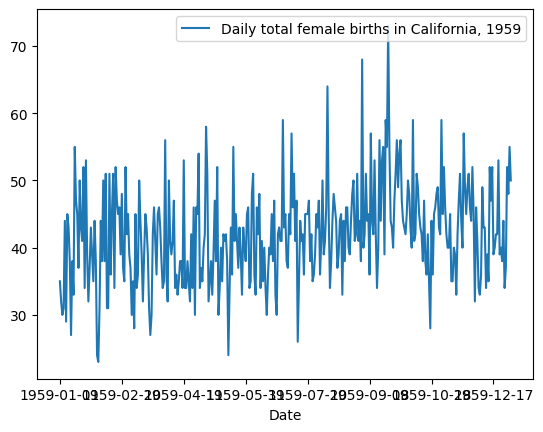

In [13]:
 f_birth.plot()

In [14]:
f_birth_mean = f_birth.rolling(window=20).mean()

<Axes: xlabel='Date'>

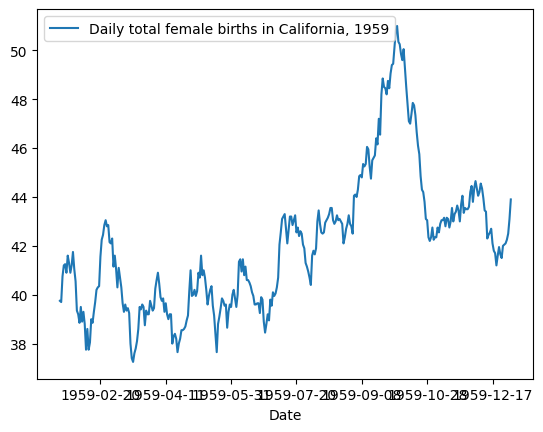

In [15]:
f_birth_mean.plot()

## Baseline model

In [16]:
value = pd.DataFrame(series_value)

In [17]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [18]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [19]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [20]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
birth_test = birth_df[1:365]

In [23]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [24]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [25]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [26]:
birth_error

84.22252747252747

In [27]:
np.sqrt(birth_error)

9.177283229394606

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

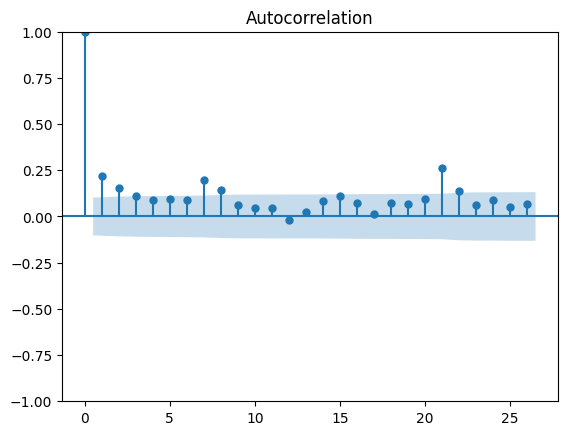

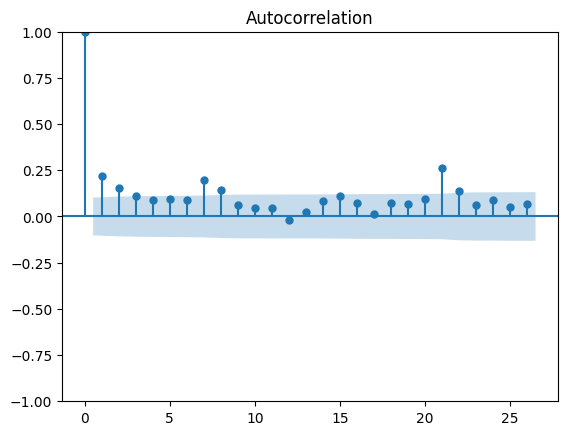

In [29]:
# plot_acf is to identify parameter q
# ARIMA(p,d,q)

plot_acf(f_birth)

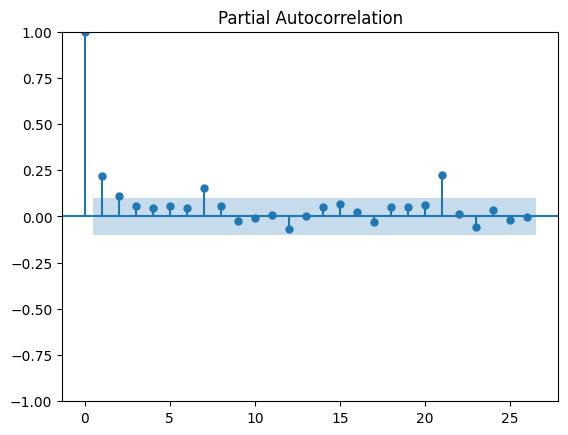

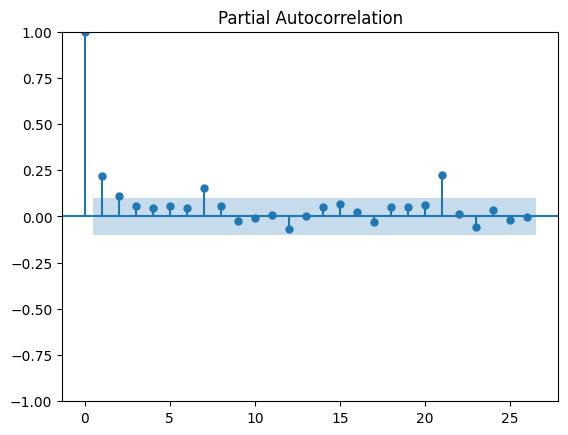

In [30]:
# plot_pacf is to identify parameter p
plot_pacf(f_birth)

In [31]:
# p = 2,3   d = 0   & q = 3,4
f_birth.size

365

In [32]:
birth_train=f_birth[0:330]
birth_test=f_birth[330:365]

In [33]:
birth_train.size

330

In [34]:
birth_test.size

35

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
pip install pandas numpy pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 61.4/614.7 kB 812.7 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/614.7 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [37]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
def find_best_arima_params(time_series):
    """
    This function takes a time series and returns the best p, d, q parameters for an ARIMA model.

    Parameters:
    time_series (pd.Series): The input time series data.

    Returns:
    tuple: The best (p, d, q) parameters.
    """
    # Fit auto_arima model
    model = auto_arima(time_series, 
                       start_p=0, max_p=5,
                       start_q=0, max_q=5,
                       seasonal=False, 
                       trace=False,
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)
    return model.order


In [38]:
def apply_arima_to_series(birth_train):
    """
    This function applies the find_best_arima_params function to multiple time series.

    Parameters:
    series_dict (dict): A dictionary where keys are the names of the time series and values are the time series data.

    Returns:
    dict: A dictionary with the best (p, d, q) parameters for each time series.
    """
    best_params = {}
    for name, series in birth_train.items():
        best_params[name] = find_best_arima_params(series)
    return best_params
if __name__ == "__main__":
    # Example time series data
    time_series_data = {
        "series1": pd.Series(np.random.randn(100).cumsum() + 100),
        "series2": pd.Series(np.random.randn(100).cumsum() + 200),
        "series3": pd.Series(np.random.randn(100).cumsum() + 300)
    }

    # Find the best ARIMA parameters for each time series
    best_arima_params = apply_arima_to_series(time_series_data)

    # Print the best parameters
    for series_name, params in best_arima_params.items():
        print(f"Best ARIMA parameters for {series_name}: p={params[0]}, d={params[1]}, q={params[2]}")


Best ARIMA parameters for series1: p=0, d=1, q=0
Best ARIMA parameters for series2: p=0, d=1, q=0
Best ARIMA parameters for series3: p=0, d=1, q=0


In [125]:
birth_model = ARIMA(birth_train,order = (2,1,3))

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [126]:
birth_model_fit = birth_model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [127]:
birth_model_fit.aic

2229.8533100343043

In [128]:
birth_forecast = birth_model_fit.forecast(steps = 35).iloc[0:35]

In [129]:
birth_forecast

1959-11-27    45.022068
1959-11-28    44.995074
1959-11-29    44.579873
1959-11-30    44.739929
1959-12-01    44.452109
1959-12-02    44.658038
1959-12-03    44.418625
1959-12-04    44.628595
1959-12-05    44.413203
1959-12-06    44.615229
1959-12-07    44.415936
1959-12-08    44.606980
1959-12-09    44.420853
1959-12-10    44.600532
1959-12-11    44.426174
1959-12-12    44.594871
1959-12-13    44.431378
1959-12-14    44.589678
1959-12-15    44.436325
1959-12-16    44.584841
1959-12-17    44.440984
1959-12-18    44.580314
1959-12-19    44.445361
1959-12-20    44.576070
1959-12-21    44.449469
1959-12-22    44.572090
1959-12-23    44.453324
1959-12-24    44.568357
1959-12-25    44.456940
1959-12-26    44.564854
1959-12-27    44.460332
1959-12-28    44.561569
1959-12-29    44.463514
1959-12-30    44.558486
1959-12-31    44.466500
Freq: D, Name: predicted_mean, dtype: float64

In [130]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [131]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.664974379284187

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0],parse_dates=[0])

In [134]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [135]:
f_birth = f_birth[0:365]

In [136]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [137]:
# Normalization
# 1. If your data is on different scales
# 2. Because algorithms work better when data is mormalized
# Normalization = (x-min)/(max-min)

In [138]:
f_birth.min()

Daily total female births in California, 1959    23
dtype: int64

In [139]:
f_birth.max()

Daily total female births in California, 1959    73
dtype: int64

In [140]:
(37-23)/(73-23)

0.28

In [141]:
(55-23)/(73-23)

0.64

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
birth_arr = f_birth.values

In [144]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [145]:
scaler = MinMaxScaler(feature_range=(0,1))

In [146]:
scaler = scaler.fit(birth_arr)

In [147]:
scaler.data_min_

array([23.])

In [148]:
scaler.data_max_

array([73.])

In [149]:
scaler.data_range_

array([50.])

In [150]:
birth_normalize = scaler.transform(birth_arr)

In [151]:
birth_normalize[0]

array([0.24])

In [152]:
birth_normalize[1]

array([0.18])

In [153]:
for i in range(5):
    print(birth_normalize[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [154]:
birth_train=birth_normalize[0:330]
birth_test=birth_normalize[330:365]

In [155]:
birth_train.size

330

In [156]:
birth_test.size

35

In [157]:
from statsmodels.tsa.arima.model import ARIMA

In [165]:
 birth_model = ARIMA(birth_train,order=(2,1,2))

In [166]:
birth_model_fit = birth_model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [167]:
birth_model_fit.aic

-342.6257523195206

In [168]:
birth_forecast = birth_model_fit.forecast(steps = 35)

In [169]:
birth_forecast

array([0.44108652, 0.43520536, 0.43157099, 0.43039785, 0.42997574,
       0.42982723, 0.42977474, 0.42975621, 0.42974966, 0.42974735,
       0.42974653, 0.42974625, 0.42974614, 0.42974611, 0.4297461 ,
       0.42974609, 0.42974609, 0.42974609, 0.42974609, 0.42974609,
       0.42974609, 0.42974609, 0.42974609, 0.42974609, 0.42974609,
       0.42974609, 0.42974609, 0.42974609, 0.42974609, 0.42974609,
       0.42974609, 0.42974609, 0.42974609, 0.42974609, 0.42974609])

In [170]:
birth_test

array([[0.56],
       [0.46],
       [0.42],
       [0.58],
       [0.44],
       [0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ],
       [0.22],
       [0.32],
       [0.24],
       [0.58],
       [0.48],
       [0.58],
       [0.32],
       [0.34],
       [0.38],
       [0.38],
       [0.6 ],
       [0.32],
       [0.34],
       [0.3 ],
       [0.42],
       [0.22],
       [0.28],
       [0.58],
       [0.5 ],
       [0.64],
       [0.54]])

In [84]:
type(birth_model_fit)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [162]:
type(f_birth)

pandas.core.frame.DataFrame

In [171]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [173]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

0.13332499482935012

In [174]:
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast),1)

In [175]:
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

In [176]:
birth_forecast_reverse

array([[45.05432614],
       [44.76026814],
       [44.57854952],
       [44.51989228],
       [44.4987869 ],
       [44.49136128],
       [44.48873698],
       [44.48781035],
       [44.48748311],
       [44.48736754],
       [44.48732673],
       [44.48731232],
       [44.48730723],
       [44.48730543],
       [44.4873048 ],
       [44.48730457],
       [44.48730449],
       [44.48730447],
       [44.48730446],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445],
       [44.48730445]])

In [177]:
birth_test_reshape = birth_test.reshape(len(birth_test),1)

In [178]:
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [181]:
np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse))

6.666249741467505

## Standardization

Standardization = (x-mean)/standard deviation

In [182]:
from sklearn.preprocessing import StandardScaler

In [184]:
std_scalar = StandardScaler()
std_scalar = std_scalar.fit(birth_arr)

In [185]:
std_scalar.mean_

array([41.98082192])

In [186]:
std_scalar.var_

array([53.84894727])

In [187]:
std_birth = std_scalar.transform(birth_arr)

In [188]:
std_birth[0]

array([-0.95130099])

In [189]:
std_birth[5]

array([-1.76894196])

In [190]:
std_birth_train = std_birth[0:330]
std_birth_test = std_birth[330:365]

In [191]:
std_birth_arima = ARIMA(std_birth_train,order=(2,1,2))

In [192]:
std_birth_arima_fit = std_birth_arima.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [193]:
std_birth_arima_fit.aic

920.031242794297

In [197]:
std_birth_forecast = std_birth_arima_fit.forecast(steps=35)

In [198]:
std_birth_forecast

array([0.41877206, 0.37872501, 0.3539594 , 0.34598288, 0.34311606,
       0.34210889, 0.34175344, 0.34162811, 0.34158391, 0.34156832,
       0.34156282, 0.34156088, 0.3415602 , 0.34155996, 0.34155987,
       0.34155984, 0.34155983, 0.34155983, 0.34155983, 0.34155983,
       0.34155983, 0.34155983, 0.34155983, 0.34155983, 0.34155983,
       0.34155983, 0.34155983, 0.34155983, 0.34155983, 0.34155983,
       0.34155983, 0.34155983, 0.34155983, 0.34155983, 0.34155983])

In [199]:
std_birth_test

array([[ 1.22907491],
       [ 0.54770744],
       [ 0.27516045],
       [ 1.3653484 ],
       [ 0.41143395],
       [-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [200]:
birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast),1)

In [201]:
std_birth_forecast_rev = std_scalar.inverse_transform(birth_forecast_reshape)

In [202]:
std_birth_forecast_rev

array([[45.05384841],
       [44.75997577],
       [44.57824123],
       [44.51970805],
       [44.49867077],
       [44.49128   ],
       [44.48867161],
       [44.4877519 ],
       [44.48742754],
       [44.48731316],
       [44.48727282],
       [44.4872586 ],
       [44.48725358],
       [44.48725181],
       [44.48725119],
       [44.48725097],
       [44.48725089],
       [44.48725086],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085],
       [44.48725085]])

In [204]:
birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)

In [206]:
birth_test_rev = std_scalar.inverse_transform(birth_test_reshape)

In [207]:
birth_test_rev

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [208]:
np.sqrt(mean_squared_error(birth_test_rev,birth_forecast_reverse))

6.666249741467505

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0], parse_dates = [0], nrows=365)

In [211]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [212]:
f_birth['lag1'] = f_birth['Daily total female births in California, 1959'].shift(1)

In [213]:
f_birth.head()

,"Daily total female births in California, 1959",lag1
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [214]:
f_birth['lag2'] =  f_birth['Daily total female births in California, 1959'].shift(2)

In [215]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2
Date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,35.0
1959-01-04,31,30.0,32.0
1959-01-05,44,31.0,30.0


In [216]:
f_birth['lag3'] =  f_birth['Daily total female births in California, 1959'].shift(3)

In [217]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [218]:
f_birth['MA3'] = f_birth['Daily total female births in California, 1959'].rolling(window=3).mean()

In [219]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3,MA3
Date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333
1959-01-04,31,30.0,32.0,35.0,31.000000
1959-01-05,44,31.0,30.0,32.0,35.000000


In [220]:
f_birth['MA4'] = f_birth['Daily total female births in California, 1959'].rolling(window=4).mean()

In [221]:
f_birth['MA5'] = f_birth['Daily total female births in California, 1959'].rolling(window=5).mean()

In [222]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3,MA3,MA4,MA5
Date,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4


In [223]:
f_birth['Max_5'] = f_birth['Daily total female births in California, 1959'].rolling(window=5).max()

In [224]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3,MA3,MA4,MA5,Max_5
Date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0


In [225]:
f_birth['Min_5'] = f_birth['Daily total female births in California, 1959'].rolling(window=5).min()

In [227]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5
Date,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0


In [228]:
f_birth['day'] = f_birth.index.day

In [229]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5,day
Date,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5


## 4 - Stationary Time Series - Testing

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0], parse_dates = [0], nrows=365)

In [250]:
f_birth = f_birth.iloc[:,0]

In [251]:
type(f_birth)

pandas.core.series.Series

In [232]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


<Axes: xlabel='Date'>

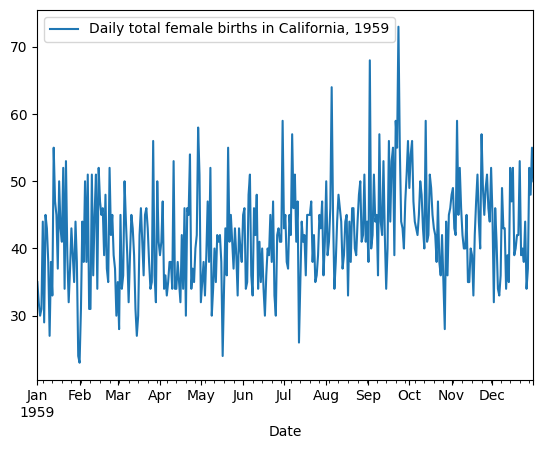

In [233]:
f_birth.plot()

array([[<Axes: title={'center': 'Daily total female births in California, 1959'}>]],
      dtype=object)

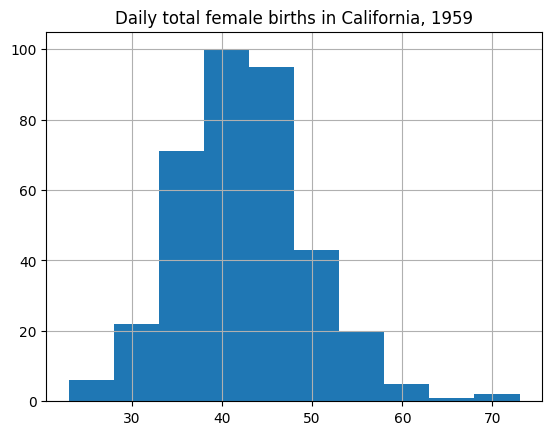

In [234]:
f_birth.hist()

In [235]:
f_birth_1 = f_birth[0:201]
f_birth_2 = f_birth[201:365]

In [236]:
f_birth_2.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [237]:
f_birth_1.mean()

Daily total female births in California, 1959    40.024876
dtype: float64

In [238]:
f_birth_2.mean()

Daily total female births in California, 1959    44.378049
dtype: float64

In [239]:
f_birth_1.var()

Daily total female births in California, 1959    49.314378
dtype: float64

In [240]:
f_birth_2.var()

Daily total female births in California, 1959    49.573994
dtype: float64

In [241]:
from statsmodels.tsa.stattools import adfuller

In [252]:
adf_test = adfuller(f_birth)

In [253]:
adf_test[0]

-4.808291253559766

In [254]:
adf_test[1]

5.243412990149813e-05

In [257]:
# Automation of Testing
def adf_test(dataset):
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    ds = pd.read_csv(dataset,index_col=[0],parse_dates=[0],nrows=365)
    ds = ds.iloc[:,0]
    print(ds.hist())
    ds_split = int(len(ds)/2) 
    ds1 = ds[0:ds_split]
    ds2 = ds[ds_split:]
    print("Mean 1 - ",ds1.mean())
    print("Mean 2 - ",ds2.mean())
    print("Var 1 - ",ds1.var())
    print("Var 2 - ",ds2.var())
    from statsmodels.tsa.stattools import adfuller
    adf_test = adfuller(ds)
    print("ADfuller Statistics - ",adf_test[0])
    print("P value - ",adf_test[1])

Axes(0.125,0.11;0.775x0.77)
Mean 1 -  39.76373626373626
Mean 2 -  44.185792349726775
Var 1 -  49.48530751016939
Var 2 -  48.97628055005103
ADfuller Statistics -  -4.808291253559766
P value -  5.243412990149813e-05


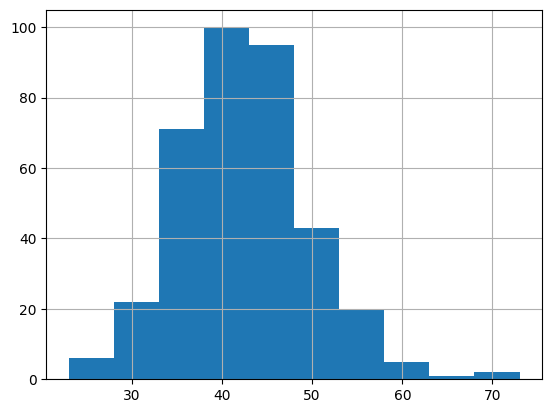

In [258]:
adf_test('daily-total-female-births-in-cal.csv')